# Inference from Scientific Data - Worksheet 2

#### Student Number: 1996263

* Bayes Theorem - $ P(S|n) = \frac{P(n|S)P(S)}{P(n)} $
    * $P(S|n)$ - posterior
    * $P(S)$ - prior
    * $P(n|S)$ - likelihood, requires the likelihood & model.
    * $P(n)$ - evidence, the probability of the data.
    
* *Jeffrey's prior* - $P(x) = \frac{A}{x} \sqcap_{x_{min}}^{x_{max}} (x)$, where $A = 1/\log({x_{max}/x_{min}})$, and where $\sqcap_{a}^{b} (x) = \begin{cases}
                                          1 & \text{if $x>a$ and $x<b$}\\
                                          0 & \text{else}
                                          \end{cases}$ 
* Poisson Distribution: $ P(n;\lambda) = \frac{\exp{(-\lambda)}\lambda^n}{n!} $
* Gaussian Distribution: $ P(x ; \mu, \sigma^2) = \frac{1}{\sigma \sqrt{2 \pi}} \exp{\left(- \frac{(x-\mu)^2}{2 \sigma^2} \right)} $                                                                    
***                                                                     
### Question 1: 

Consider the problem of estimating the density of stars S (brighter than a certain
threshold magnitude) per square degree on the sky (i.e. units [deg$^{-2}$]). After surveying 10 deg$^{-2}$ of
the sky, you count 50 such stars.
                                                                      
a) Write down the posterior PDF for $S$, assuming a *Jeffrey's prior* on $S$ between 1 deg$^{-2}$ and 100 deg$^{-2}$.

                                                                                                                                  

**Ans:**
* Prior: Here we will assume that $S_{min} = 0$, $S_{max} = 100$:
$$P(S) =  \frac{S^{-1}}{\log({S_{max}/S_{min}})} \sqcap_{S_{min}}^{S_{max}} (S)$$ 

* Liklihood -  Assuming the stars appear *independently* and with a constant density:
$$P(n|S) = \frac{\exp{(-S)}S^{n}}{n!}$$

* Marginal Liklihood - (Evidence):
$$Z \equiv P(n) = \int_{S_{min}}^{S_{max}} dS \frac{1}{S_{max}} \frac{\exp{(-S)}S^n}{n!} $$

Therefore, putting it all together we obtain 

* Posterior:
$$P(S|n) = \frac{1}{Z S_{max}} \frac{\exp{(-S)}S^n}{n!} \sqcap_{S_{min}}^{S_{max}} (S)$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import factorial
import scipy.integrate as integrate

In [2]:
''' Defining generic functions for Bayes Theorem '''

def jeffreys_prior(x, x_min, x_max):
    return ( np.heaviside(x, x_min)-np.heaviside(x-x_max, 0.5) ) / ( x_max-x_min )

def likelihood(x, area, n):
    mean = x*area # average density  
    return np.exp(-mean)*np.power(mean, n)/factorial(n)

def posterior(prior, liklihood):
    ''' where both prior and liklihood are f(x) '''
    return prior * likelihood

b) Sketch the posterior distribution for S. Find the maximum *a posteriori* value of the density
parameter, $\hat{S}$.

**Ans:**

In [3]:
''' Assigning Variables '''

n = 50
area = 10
S_min = 0
S_max = 100

Num = 1000 # number of datapoints
S_points = np.arange(0, 10, 1/Num) # to create distribution from 0 to 10

In [4]:
prior = jeffreys_prior(S_points, S_min, S_max)
likelihood = likelihood(S_points, area, n)

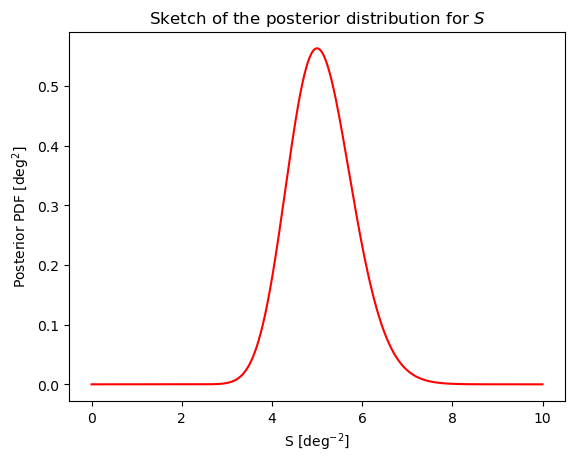

The maximum a posteriori value of the density parameter = 5.0


In [5]:
posterior_values = posterior(prior, likelihood) # calculated values 

# Finding evidence
Z = integrate.trapz(posterior_values, x=S_points)

# Plot the normalised posterior
fig = plt.subplots(dpi=100)
plt.plot(S_points, posterior_values/Z, 'r-')
plt.title('Sketch of the posterior distribution for $S$')
plt.xlabel(r"S [deg$^{-2}$]")
plt.ylabel(r"Posterior PDF [deg$^{2}$]")
plt.show()

# For a Poisson distribution the a posteriori value is the mode
mode = S_points[np.argmax(posterior_values)]

print(f'The maximum a posteriori value of the density parameter = {mode}')

c) Find the mean of the posterior distribution for $S$. Compare this to the maximum value found
above. 

**Ans:**

$\langle x \rangle = \int x P(x) \,dx $

In [6]:
mean = integrate.trapz(S_points*posterior_values/Z, x=S_points)

print(f'The mean of this distribution is {mean:.3f}')

The mean of this distribution is 5.100


The mean is *greater than* the maximum value found above.

d) Estimate the uncertainty on your measurement of the parameter $S$.

**Ans:**

In [7]:
uncertainty = np.sqrt(2*mode)/5

print(f'The uncertainty of the maximum a posteriori value is {uncertainty:.3f}')

The uncertainty of the maximum a posteriori value is 0.632


e) Later you read of a much larger survey, but its error is dominated by an uncertainty in
brightness calibration. The published estimate of S is 7.7 ±0.3 where the error is believed to
be Gaussian. Perform a new Bayesian analysis incorporate this new information into your
prior. What is the most probable value of $S$ now? Plot the the two posterior distributions
you have found (from parts b and e) on the same set of axes and comment on how they
compare. Do you think this new prior has lead to an improved measurement of $S$?

**Ans:**

As the survey is large and the error is Gaussian, I will assume the *posterior* to be Gaussian.

For a Gaussian distribution, the maximum *a posteriori* value is the **mean**, and so we can say the distribution has the form:

$$P(S|n) \sim \mathcal{N} \left(7.7, 0.3^2 \right)$$

In [8]:
def gaussian_posterior(x, mu, sigma): 
    return np.exp(-0.5*((x-mu)/sigma)**2)/np.sqrt(2*np.pi*sigma**2)

In [9]:
mu = 7.7
sigma = 0.3

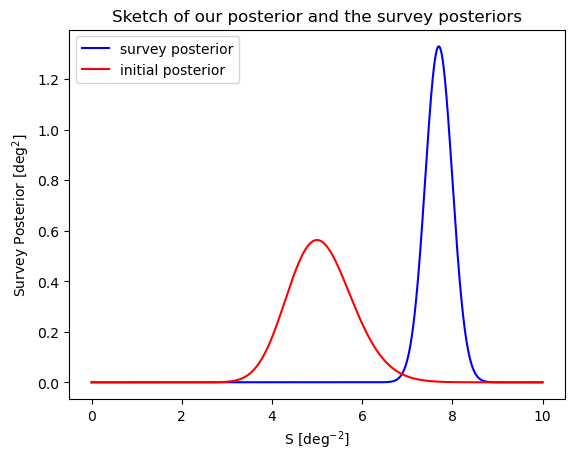

In [10]:
survey_posterior_values = gaussian_posterior(S_points, mu, sigma)

fig = plt.subplots(dpi=100)
plt.plot(S_points, survey_posterior_values, 'b-', label='survey posterior')
plt.plot(S_points, posterior_values/Z, 'r-', label='initial posterior')
plt.title('Sketch of our posterior and the survey posteriors')
plt.xlabel(r"S [deg$^{-2}$]")
plt.ylabel(r"Survey Posterior [deg$^{2}$]")

plt.legend()
plt.show()

In Bayesian inference, when presented with new information (such as the survey posterior), we use *that* as our *new prior*.

In [11]:
new_prior = survey_posterior_values

new_posterior_values = posterior(new_prior, likelihood)

new_Z = np.trapz(new_posterior_values, x=S_points) 

mode = S_points[np.argmax(new_posterior_values)]
mean = integrate.trapz(S_points*new_posterior_values/new_Z, x=S_points)

print(f'The most probable value of S is now {mode:.3f}, which is approximately equal to the mean, {mean:.3f}')

The most probable value of S is now 7.407, which is approximately equal to the mean, 7.408


The new most probable value is much greater than our answer for part b. It almost equal to the mean as the new posterior is now almost Gaussian.
***

### Question 2: 

A team of gamma-ray astronomers claim to have detected a gamma-ray burst
in a distant galaxy. You are part of a team of optical astronomers who have followed up this
source, measuring its luminosity once per hour. The galaxy itself is known to have a background
luminosity of B = 5, in arbitrary units. The data are assumed to be subject to uncorrelated
Gaussian measurement errors with standard deviation σ = 1. Thus, the j-th data point $d[t_j]$,
measured at time $t_j$= 0,1,2,... hours after the alert is assumed to be

$d[t_j] + s[t_j] + n_j$, where $n_j \sim \mathcal{N} \left(0,1 \right)$;

i.e. $d[t_j] \sim \mathcal{N} \left(s[t_j],1 \right)$

The model $s[t]$ is one of the three possibilities described below. Your job is to analyse the optical
data as they come in using two different models.

1. Model 1: There is a source characterised by a constant excess luminosity L0 at this position:

$$ s[t_j] = B + L_0$$

2. Model 2: There is a source characterised by an exponentially decaying luminosity, with initial amplitude A0 and decay constant τ:

$$ s[t_j] = B + A_0 \exp{(-t_j/ \tau)} $$

You are to perform the analysis several times, as more data gradually becomes available.
Perform the analyses after:
* 10 observations (or 10 hours)
* 24 observations (or 24 hours)
* 100 observations (or 100 hours)

The data you need to perform these analyses are provided on the course Canvas page in the files
named data_10hr.txt, data_24hr.txt, and data_100hr.txt.

a) For model 1, identify the parameter(s) of the model and choose suitable priors for these,
making your choice clear. Write down an expression for the likelihood of the data for this
model. Perform a Bayesian analysis of the data to obtain the posterior distribution on the
model parameter(s). Repeat the analysis using the 10 hour, 24 hour and 100 hour data sets;
compare how your measurements of the model parameter(s) change as you analyse more
data.

**Ans:**

I will be deploying an **MCMC approach**, which I have used before when performing linear regression.  

In [12]:
data_10 = np.loadtxt("data_10hr.txt")
data_24 = np.loadtxt("data_24hr.txt")
data_100 = np.loadtxt("data_100hr.txt")

data_set = [data_10, data_24, data_100]
data_set_names = ['data_10', 'data_24', 'data_100']
data_set_size = len(data_set)

In [13]:
def model1(times, L0, B=5):
    ''' 
    INPUTS
    ------
    L0, B: floats
            parameters of the distribution
    
    RETURNS
    ------
    Px: float
        the value of the PDF of model 1, P(x)
    '''
    size = (len(times),)
    return np.full(size, B+L0)

In [14]:
def log_prior1(L0, Lmin=0, Lmax=10):
    ''' 
    INPUTS
    ------
    L0, Lmin, Lmax : floats
                     parameters of the prior
    
    RETURNS
    ------
    log_prior: float
                the log of the prior of model 1
    '''
    if L0>Lmin and L0<Lmax:
        return -np.log(Lmax-Lmin)
    else:
        return -np.inf

def log_likelihood1(L0, data):
    ''' 
    INPUTS
    ------
    L0 : floats
        parameters of the likelihood
    data : array
    
    RETURNS
    ------
    log_likelihood: float
                    the log of the likelihood of model 1
    '''
    times = np.arange(len(data))
    x = data - model1(times, L0)
    return -0.5*np.sum(x**2) - (len(data)/2.)*np.log(2*np.pi)

def log_posterior1(L0, data, sign=1.0):
    ''' 
    INPUTS
    ------
    L0, data, sign : floats
                     parameters of the posterior
    
    RETURNS
    ------
    log_posterior: float
                    the log of the posterior of model 1
    '''
    log_prior = log_prior1(L0)
    if log_prior == -np.inf: 
        return log_prior
    else:
        return sign * (log_prior + log_likelihood1(L0, data))

### MCMC

In [15]:
import emcee
import corner

100%|██████████| 10000/10000 [00:30<00:00, 329.94it/s]


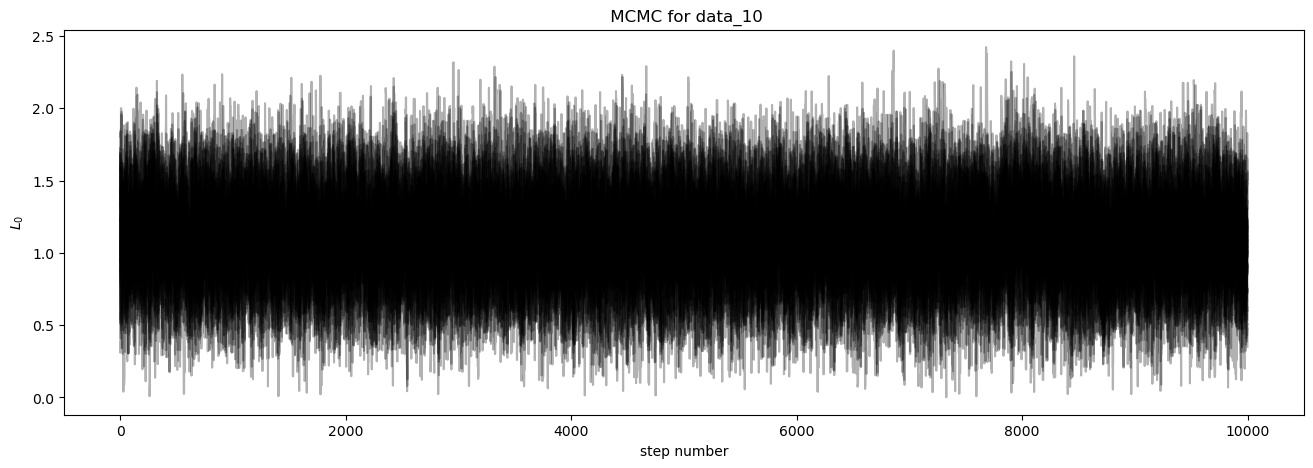

100%|██████████| 10000/10000 [00:30<00:00, 323.53it/s]


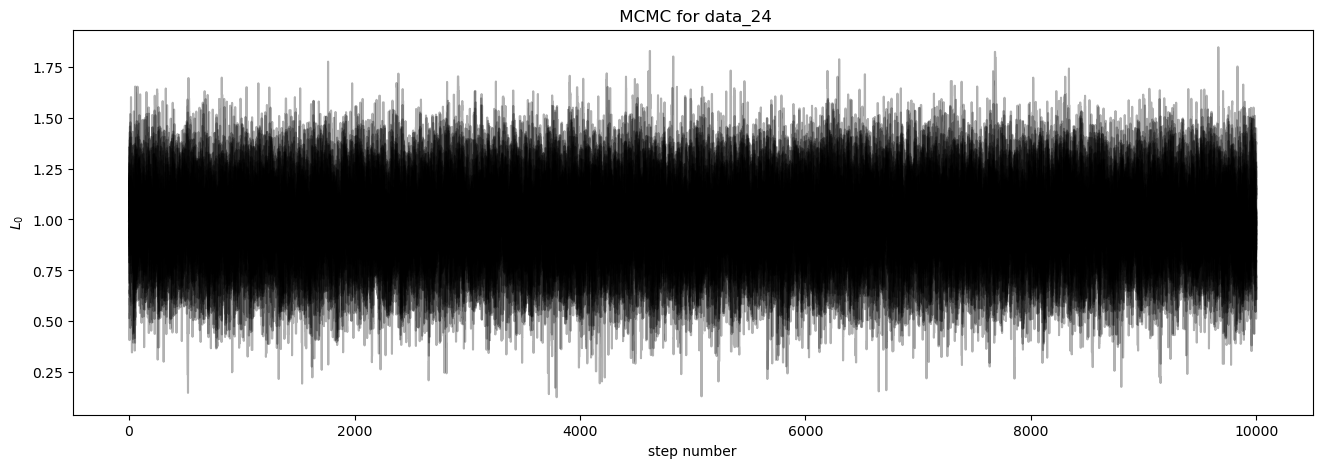

100%|██████████| 10000/10000 [00:31<00:00, 320.88it/s]


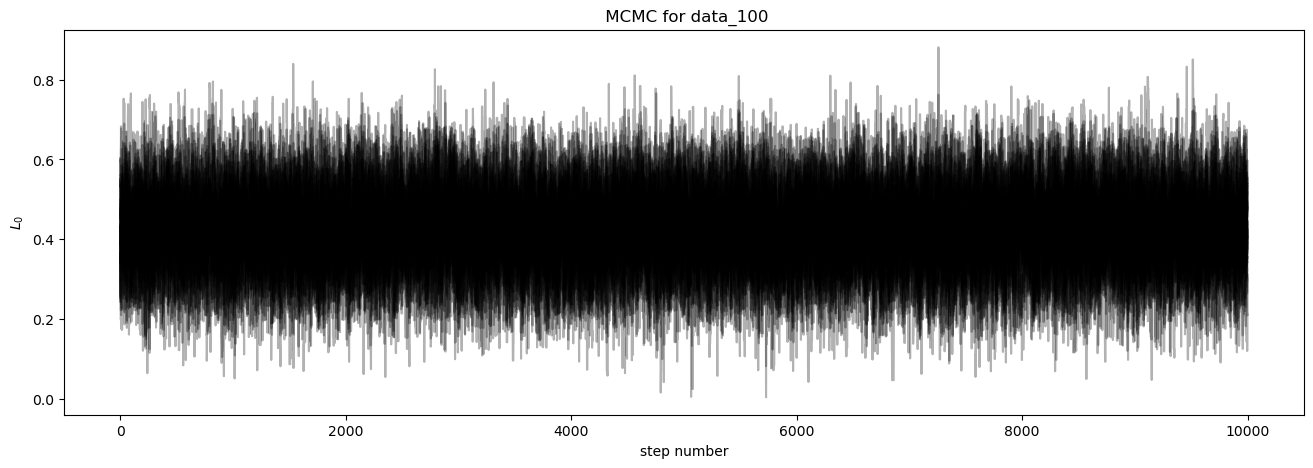

In [16]:
pos = np.abs(np.random.randn(30,1)) # random start location --> chosen to start at a +ve value (as L_0 must be positive)
nwalkers, ndim = pos.shape

samples = [] # for the MCMC graph
flat_samples = [] # for the corner plot

for i in range(data_set_size):
    
    sampler = emcee.EnsembleSampler(
        nwalkers, ndim, log_posterior1, args=([data_set[i]])
    )

    state = sampler.run_mcmc(pos, nsteps=1000)

    sampler.reset() 
    sampler.run_mcmc(state, 10000, progress=True) # run algorithm for 10000 iterations
    samples.append(sampler.get_chain())

    flat_samples.append(sampler.get_chain(discard=500, thin=20, flat=True))
    
    labels = ['$L_0$']
    
    figure = plt.figure(figsize=[16,5])
    plt.plot(samples[i][:, :, 0], "k", alpha=0.3)
    plt.title(f' MCMC for {data_set_names[i]}')
    plt.ylabel(labels[0])
    plt.xlabel('step number')
    plt.show();

For data_10, the value for L0 is 1.10
For data_24, the value for L0 is 0.99
For data_100, the value for L0 is 0.43


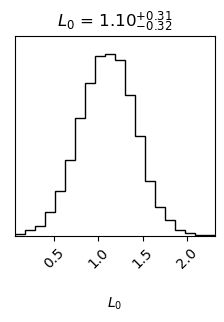

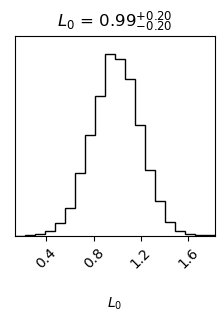

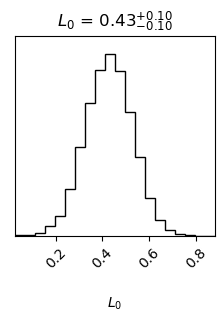

In [17]:
for i in range(data_set_size):
    fig = corner.corner(
        flat_samples[i], labels=labels,
        show_titles=True
        );
    print(f'For {data_set_names[i]}, the value for L0 is {np.mean(flat_samples[i]):.2f}')

The values of $\hat{L}$ are shown above (with the code calculating the *mean* value as opposed to the mode, but as it tends to a Gaussian distribution these are equal). 

The errors in these values are displayed on the corner plots.

We can see that as we increase the number of data points we have, our value for $\hat{L}$ decreases. This makes sense as we are recording a burst, and so we would expect the mode of the excess luminosity to decrease once the burst has passed us.

b) Repeat for model 2.

In [18]:
def model2(times, theta, B=5):
    ''' 
    INPUTS
    ------
    theta: list
            parameters A and tau of the distribution
    B: float
    
    RETURNS
    ------
    Px: float
        the value of the PDF of model 2, P(x)
    '''
    A, tau = theta
    return np.full((len(times),), B) + A*np.exp(-times/tau)

In [19]:
def log_prior2(theta, Amin=0, Amax=10., Tmin=1.0e-3, Tmax=250):
    ''' 
    INPUTS
    ------
    theta: list
            parameters A and tau of the prior
    Amin, Amax, Tmin, Tmax: float
                            parameters of the prior
    
    RETURNS
    ------
    log_prior: float
                the log of the prior of model 2
    '''
    A, tau = theta
    if A>Amin and A<Amax and tau>Tmin and tau<Tmax:
        return -np.log(Tmax-Tmin)-np.log(Amax-Amin)
    else:
        return -np.inf
        
def log_likelihood2(theta, data):
    ''' 
    INPUTS
    ------
    theta: list
            parameters A and tau of the likelihood
    data: array
    
    RETURNS
    ------
    log_prior: float
                the log of the prior of model 2
    '''
    times = np.arange(len(data))
    x = data - model2(times, theta)
    return -0.5*np.sum(x**2) - (len(data)/2.)*np.log(2*np.pi)

def log_posterior2(theta, data, sign=1.0):
    ''' 
    INPUTS
    ------
    theta: list
            parameters A and tau of the posterior
    data: array
    
    RETURNS
    ------
    log_prior: float
                the log of the posterior of model 2
    '''
    A, tau = theta
    log_prior = log_prior2(theta)
    if log_prior == -np.inf: 
        return log_prior
    else:
        return sign * (log_prior + log_likelihood2(theta, data))

100%|██████████| 10000/10000 [01:47<00:00, 93.14it/s]


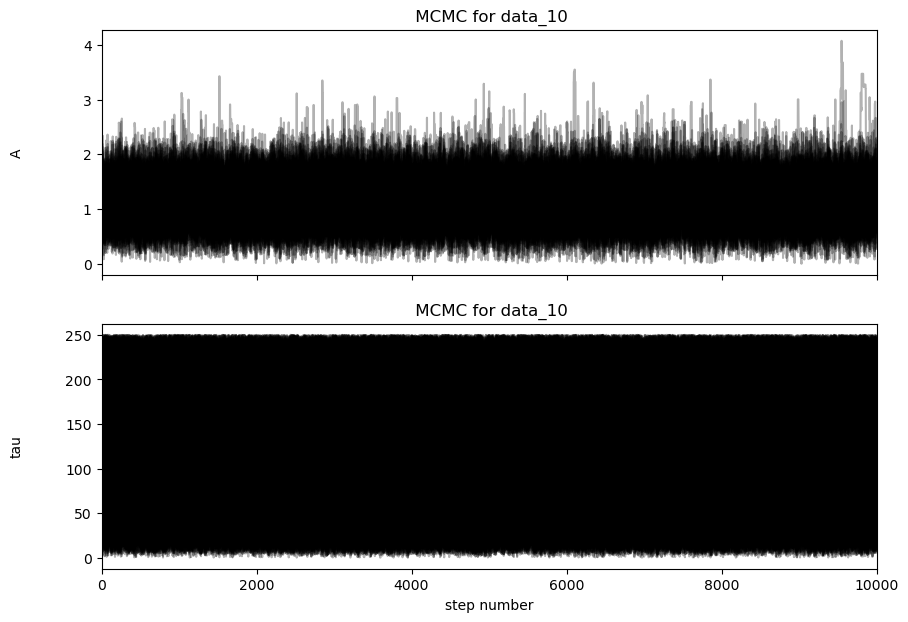

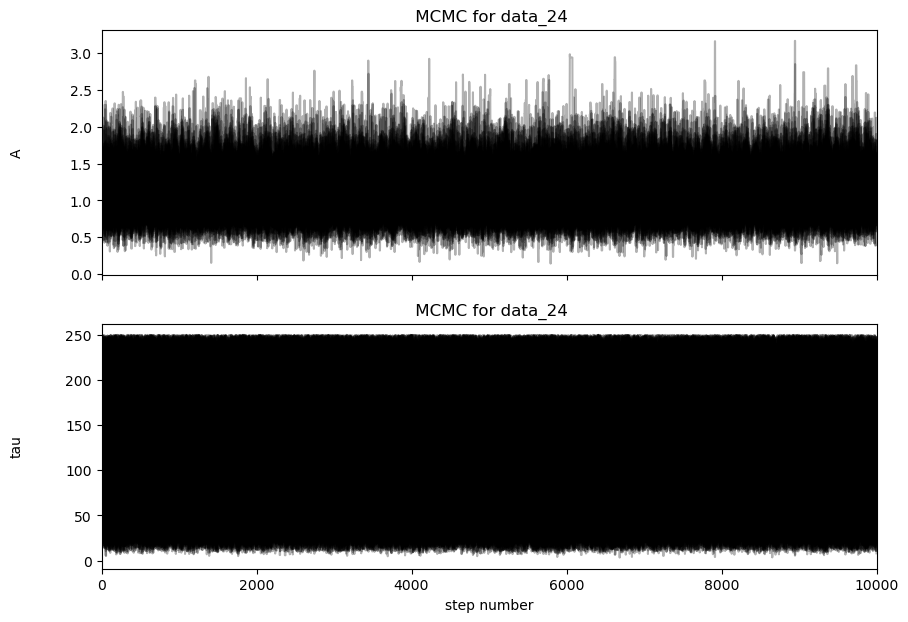

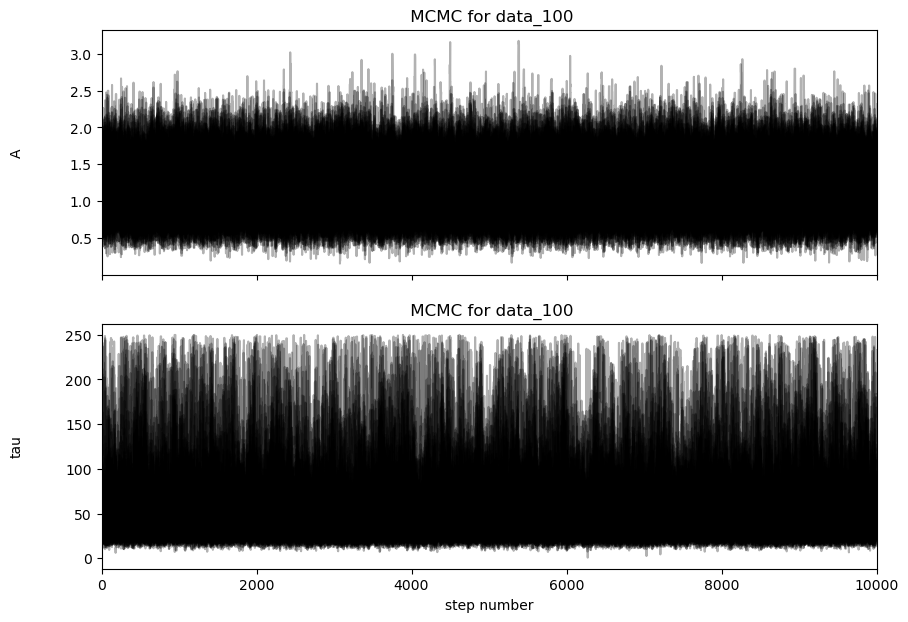

In [24]:
pos = np.abs(np.random.randn(100, 2)) # only starting at positive values for A and tau
nwalkers, ndim = pos.shape

samples2 = [] # for the MCMC graph
flat_samples2 = [] # for the corner plot

for i in range(data_set_size):

    sampler = emcee.EnsembleSampler(
        nwalkers, ndim, log_posterior2, args=([data_set[i]])
    )

    state = sampler.run_mcmc(pos, 1000)
    sampler.reset() 
    sampler.run_mcmc(state, 10000, progress=True) # run algorithm for 10000 iterations
    
    samples2.append(sampler.get_chain())
    flat_samples2.append(sampler.get_chain(discard=500, thin=20, flat=True))
    
    fig, axes = plt.subplots(2, figsize=(10, 7), sharex=True)
    labels = ["A", "tau"]
    for j in range(ndim):
        ax = axes[j]
        ax.plot(samples2[i][:, :, j], "k", alpha=0.3)
        ax.set_xlim(0, len(samples2[i]))
        ax.set_ylabel(labels[j])
        ax.yaxis.set_label_coords(-0.1, 0.5)
        ax.set_title(f' MCMC for {data_set_names[i]}')
        axes[-1].set_xlabel("step number");

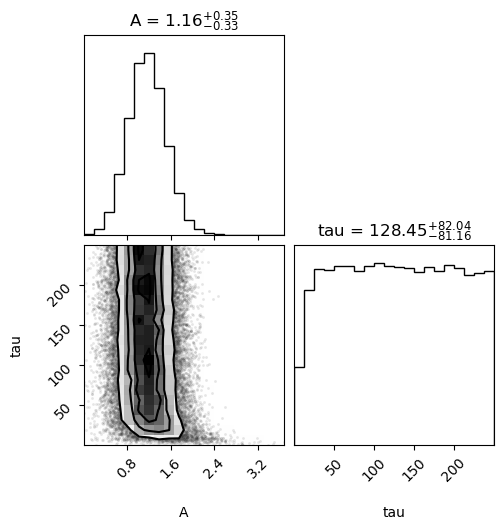

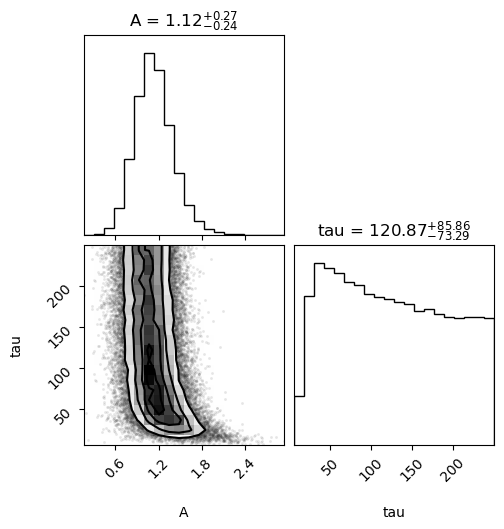

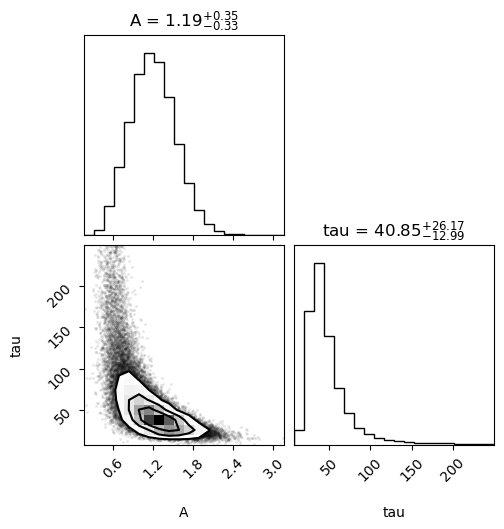

In [25]:
for i in range(data_set_size):
    fig = corner.corner(
        flat_samples2[i], labels=labels,
        show_titles=True
        );

From this MCMC sampler we have obtained the optimized parameters of:

* data_10: $A = 1.16_{-0.33}^{+0.34}$, $\tau = 129.75_{-81.43}^{+81.43}$

* data_24: $A = 1.12_{-0.24}^{+0.27}$, $\tau = 122.31_{-73.12}^{+85.67}$

* data_100: $A = 1.19_{-0.32}^{+0.35}$, $\tau = 40.99_{-13.12}^{+25.54}$

As we can see from the uncertainties, the values for $\tau$ for data_10 and data_24 are much too broad to feel confident in their value, however the value for data_100 is much better.

As we analyse more data, our value for $A$ doesn't seem to chance by much (initially going down, then rising above the initial value). However our value for $\tau$ changes dramatically, and constantly decreases in value with the more observations we have (most likely coverging on the true value).

$\tau$ is heavily dependent on what we choose as our maximum value in our prior (especially for our initial datasets). This is most likely due to the fact that the MCMC finds it difficult to converge on the true value (due to the lack of sufficient data). 

***

### Extra : Plotting the posterior on a grid of points

(To see if I arrive at a similar result for Q1)

In [26]:
from scipy.optimize import minimize

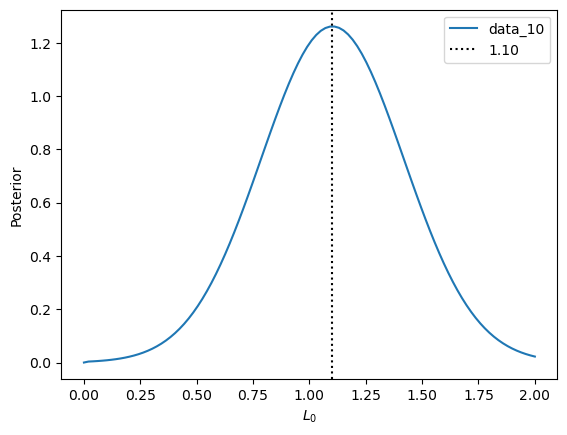

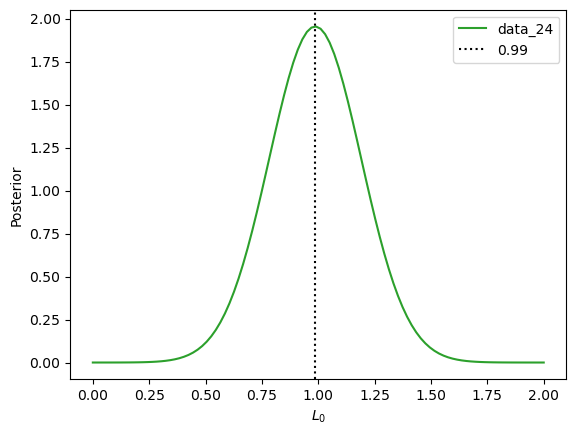

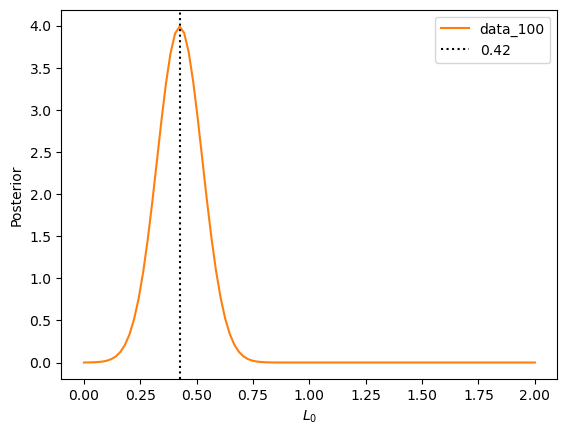

The maximum a posteriori value of L for the data is [1.1021084076685166, 0.9864026143068332, 0.42471608075667683]
The log marginal liklihood for the data is [ -15.45233024  -33.59824321 -150.36127559]


In [27]:
L_hat = []
Z_10_1 = []
guess = [1,1,0.3]
color = ['tab:blue','tab:green', 'tab:orange']
label = ['data_10', 'data_24', 'data_100']

for i in range(data_set_size): # all 3 datasets at once
    ans = minimize(log_posterior1, [guess[i]], args=(data_set[i], -1))
    L_hat.append(ans.x[0])

    # log-Evidence for model 1
    L0_int_grid = np.linspace(0, 10, 10000)
    Z_10_1.append(integrate.trapz(np.array([np.exp(log_posterior1(x, data_set[i])) for x in L0_int_grid]), 
                   x=L0_int_grid))

    # Plot the posterior on L0 for model 1
    Lvals = np.linspace(0, 2, 100)
    post = np.array([ np.exp(log_posterior1(L, data_set[i]))/Z_10_1[i] for L in Lvals])
    fig = plt.subplots(dpi=100)
    plt.plot(Lvals, post, color=color[i], label=label[i])
    plt.axvline(L_hat[i], ls=':', c='k', label=f'{L_hat[i]:.2f}')
    plt.xlabel("$L_0$")
    plt.ylabel("Posterior")
    plt.legend()
    plt.show()

print(f'The maximum a posteriori value of L for the data is {L_hat}')
print(f'The log marginal liklihood for the data is {np.log(Z_10_1)}')

As we analyse more data the value for $\hat{L}$ continues to get lower, starting at 1.1 for 10 hours, and ending at 0.42 for 100 hours. These values agree with what we found using the MCMC method above.

What we can suggest from this data is that the brightness of this gamma-ray burst is diminishing over time, which makes sense as it was 'a burst'.